In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings

plt.rc("font", family = "AppleGothic")
sns.set(font="AppleGothic", rc={"axes.unicode_minus":False}, style='white')

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [8]:
customers=pd.read_csv('data/customers.csv')
locations=pd.read_csv('data/locations.csv')
order_items=pd.read_csv('data/order_items.csv')
orders=pd.read_csv('data/orders.csv')
payments=pd.read_csv('data/payments.csv')
products=pd.read_csv('data/products.csv')
reviews=pd.read_csv('data/reviews.csv')
sellers=pd.read_csv('data/sellers.csv')

df=pd.read_csv('data/order_final.csv')

In [4]:
#데이터 요약

def data_summary(df):
    df_copy=pd.DataFrame(index=df.columns)
    df_copy['count']=df.count()
    df_copy['dtype']=df.dtypes
    df_copy['nunique']=df.nunique()
    df_copy['%nunique']=(df_copy['nunique']/len(df))*100
    df_copy['%null']=(df.isnull().sum()/len(df))*100

    df_copy['min']=[df[col].min() if df[col].dtype!='object' else None for col in df.columns]
    df_copy['max']=[df[col].max() if df[col].dtype!='object' else None for col in df.columns]

    df_copy.reset_index(inplace=True)
    df_copy=df_copy.rename(columns={"index":"Column Name"})
    df_copy=df_copy.round(3)
    
    return df_copy

In [24]:
display(data_summary(df))
display(df.info())

,Column Name,count,dtype,nunique,%nunique,%null,min,max
0,Order_id,87948,object,87948,100.000,0.000,NaN,NaN
1,items,87948,int64,17,0.019,0.000,1.00,21.00
2,payment_price,87948,float64,25686,29.206,0.000,10.07,13664.08
3,unique_product,87948,int64,7,0.008,0.000,1.00,7.00
4,Customer_id,87948,object,87948,100.000,0.000,NaN,NaN
5,Order_purchase_timestamp,87948,object,87472,99.459,0.000,NaN,NaN
6,Order_delivered_customer_date,87948,object,87190,99.138,0.000,NaN,NaN
7,Order_estimated_delivery_date,87948,object,416,0.473,0.000,NaN,NaN
8,year,87948,int64,3,0.003,0.000,2017.00,2019.00
9,month,87948,int64,12,0.014,0.000,1.00,12.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87948 entries, 0 to 87947
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Order_id                       87948 non-null  object 
 1   items                          87948 non-null  int64  
 2   payment_price                  87948 non-null  float64
 3   unique_product                 87948 non-null  int64  
 4   Customer_id                    87948 non-null  object 
 5   Order_purchase_timestamp       87948 non-null  object 
 6   Order_delivered_customer_date  87948 non-null  object 
 7   Order_estimated_delivery_date  87948 non-null  object 
 8   year                           87948 non-null  int64  
 9   month                          87948 non-null  int64  
 10  hour                           87948 non-null  int64  
 11  weekday                        87948 non-null  object 
 12  year_de                        87948 non-null 

None

In [27]:
#datetime으로 변경
df['Order_purchase_timestamp']=pd.to_datetime(df['Order_purchase_timestamp'])
df['Order_delivered_customer_date']=pd.to_datetime(df['Order_delivered_customer_date'])

#주문-배송 시간 계산
df['delivery_date']=(df['Order_delivered_customer_date']-df['Order_purchase_timestamp']).dt.days

In [73]:
df.to_csv('data/order_final.csv')

## Reduce delivery time
- 현재 주문~배송 평균 시간
- 현재 주문~물류처리 평균 시간
- 지역별 배송시간
- 셀러별 배송시간 평균

- 예상 배송 시간과 실제 배송 시간 차이 (정시, 늦음, 빠름)

- 배송시간 년도별 추이
- 배송시간별 고객만족도 추이
- 카테고리별 배송 시간

### 현재 주문~배송 평균 시간

Text(0.5, 1.0, '주문~배송 시간 boxplot')

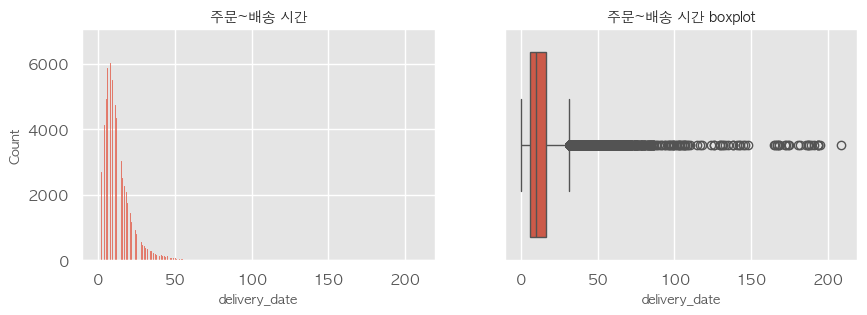

In [30]:

plt.rc('font', size=8)  # 전체 폰트 크기를 14로 변경
plt.rc('axes', titlesize=10)  # 제목 폰트 크기를 18로 변경

fig,axes=plt.subplots(1,2,figsize=(10,3))

sns.histplot(data=df,x='delivery_date',ax=axes[0])
axes[0].set_title("주문~배송 시간")

sns.boxplot(data=df,x='delivery_date',ax=axes[1])
axes[1].set_title("주문~배송 시간 boxplot")

In [33]:
from scipy. stats import mode

print('평균 :',np.mean(df['delivery_date']))
print('중앙값 :',np.median(df['delivery_date']))
print('최대 :',np.max(df['delivery_date']))
print('최소 :',np.min(df['delivery_date']))
print('최빈 :',mode(df['delivery_date']))


평균 : 12.438088415882111
중앙값 : 10.0
최대 : 209
최소 : 0
최빈 : ModeResult(mode=7, count=6726)


평균 배송시간은 12일, 중앙값은 10이다. 
최빈값이 7일인 것을 보아 보통 배송이 일주일 뒤에 되나보다. 

### 지역별 배송 시간 평균


In [38]:
df.groupby('Customer_state')['delivery_date'].median().sort_values(ascending=True).reset_index()

,Customer_state,delivery_date
0,SP,7.0
1,MG,10.0
2,PR,10.0
3,DF,11.0
4,RJ,12.0
5,RS,13.0
6,ES,13.0
7,SC,13.0
8,MS,14.0
9,GO,14.0


### 실제 배송 시간과 예상 배송 시간 차이

In [39]:
print('평균 :',np.mean(df['differ_deliver']))
print('중앙값 :',np.median(df['differ_deliver']))
print('최대 :',np.max(df['differ_deliver']))
print('최소 :',np.min(df['differ_deliver']))
print('최빈 :',mode(df['differ_deliver']))


평균 : -12.220721335334515
중앙값 : -13.0
최대 : 181
최소 : -147
최빈 : ModeResult(mode=-14, count=6765)


Text(0.5, 1.0, '주문~배송 시간 boxplot')

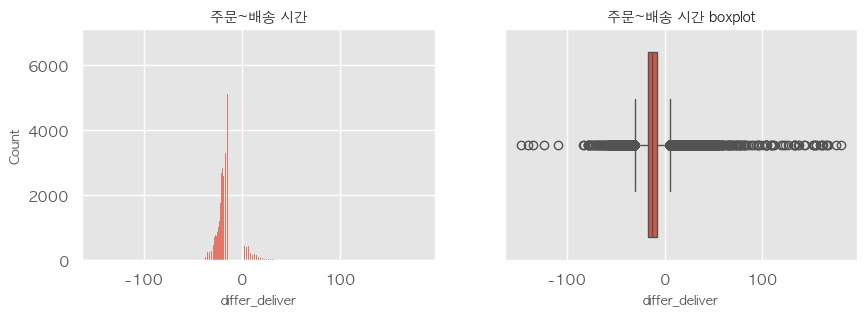

In [17]:
#주문~배송 평균시간

plt.rc('font', size=8)  # 전체 폰트 크기를 14로 변경
plt.rc('axes', titlesize=10)  # 제목 폰트 크기를 18로 변경

fig,axes=plt.subplots(1,2,figsize=(10,3))

sns.histplot(data=df,x='differ_deliver',ax=axes[0])
axes[0].set_title("주문~배송 시간")

sns.boxplot(data=df,x='differ_deliver',ax=axes[1])
axes[1].set_title("주문~배송 시간 boxplot")


In [68]:
df.groupby('differ')['Order_id'].count().reset_index()#원그래프 그리기

,differ,Order_id
0,fast,81061
1,late,5919
2,on time,968


### 셀러별 배송시간 평균

In [49]:
seller_order=pd.merge(sellers,order_items,on='Seller_id')
seller_order=seller_order[['Seller_id','Order_id']]
seller_order=pd.merge(seller_order,df,on='Order_id')
seller_order=seller_order[['Seller_id','Order_id','delivery_date']]
seller_order.head()

,Seller_id,Order_id,delivery_date
0,SELLER_0000,ORDER_84286,8
1,SELLER_0000,ORDER_35525,28
2,SELLER_0000,ORDER_56839,2
3,SELLER_0001,ORDER_46315,11
4,SELLER_0001,ORDER_44578,7


In [52]:
seller_order_delivery=seller_order.groupby('Seller_id')['delivery_date'].mean().sort_values().reset_index()
seller_order_delivery.head()

,Seller_id,delivery_date
0,SELLER_0704,1.0
1,SELLER_2049,1.0
2,SELLER_1400,1.0
3,SELLER_2264,1.0
4,SELLER_2154,1.0


In [66]:
seller_order_delivery.head()

,Seller_id,delivery_date
0,SELLER_0704,1.0
1,SELLER_2049,1.0
2,SELLER_1400,1.0
3,SELLER_2264,1.0
4,SELLER_2154,1.0


<Axes: title={'center': '셀러들의 평균 배송 기간'}, xlabel='delivery_date'>

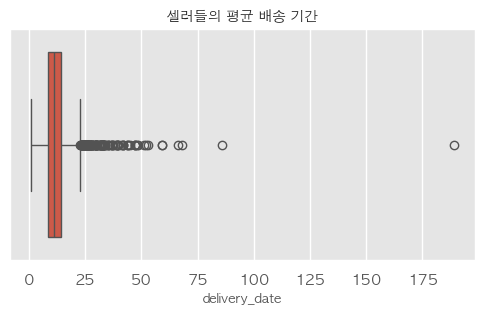

In [62]:
plt.figure(figsize=(6,3))
plt.title("셀러들의 평균 배송 기간")
sns.boxplot(data=seller_order_delivery,x='delivery_date')

예상 배송날짜보다 12일 더 빨리 오는 편..! 이러면 배송 예상 날짜가 의미가 있나? 없다. KPI를 지정할게 아니라 배송예상일을 제대로 맞추는게 먼저다 이 이커머스 회사는

In [63]:
print('평균 :',np.mean(seller_order_delivery['delivery_date']))
print('중앙값 :',np.median(seller_order_delivery['delivery_date']))
print('최대 :',np.max(seller_order_delivery['delivery_date']))
print('최소 :',np.min(seller_order_delivery['delivery_date']))
print('최빈 :',mode(seller_order_delivery['delivery_date']))

평균 : 12.125324148849394
중앙값 : 11.015384615384615
최대 : 189.0
최소 : 1.0
최빈 : ModeResult(mode=7.0, count=73)


### 만족도별 배송시간 평균



In [71]:
df.groupby('Review_score')['delivery_date'].mean().sort_values().reset_index()

,Review_score,delivery_date
0,4.333333,3.000000
1,5.000000,10.479746
2,4.000000,12.170104
3,4.500000,12.326923
4,3.500000,12.913043
5,3.000000,14.136401
6,2.000000,16.547380
7,1.500000,17.000000
8,2.500000,18.266667
9,1.000000,21.435476


역시 만족도가 높을수록 배송일이 빠른 것을 볼 수 있다. 